# House Price Prediction

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
%matplotlib inline

## PREPARE DATA

In [2]:
#Load data and set columns
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./Dataset/housingdata.csv', names=cols)

In [3]:
#Data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
#Split data on features and labels
#Grab only RM column to train model
X_train = data['RM']
y_train = data['MEDV']

## CREATE MODEL

In [6]:
#Placeholders
x = tf.placeholder(tf.float32, shape=[None])
y_true = tf.placeholder(tf.float32, shape=[None])

In [7]:
#Variables
a = tf.Variable(0.81)
b = tf.Variable(0.12)

In [8]:
#Linear equation
y_pred = a*x +b

In [9]:
#Error
error  = tf.reduce_mean(tf.square(y_pred - y_true))

#Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

## TRAIN MODEL

In [ ]:
#Number of epochs
n_epoch = 100000

#Init global variables
init = tf.initializers.global_variables()

#Create session
with tf.Session() as sess:
        sess.run(init)

        for epoch in range(n_epoch):
            
            #Shuffle data after each epoch
            shuf1 = np.arange(X_train.shape[0])
            random.shuffle(shuf1)
            X_train = X_train[shuf1]
            y_train = y_train[shuf1]
                        
            #TRAIN MODEL
            sess.run(train, feed_dict={x: X_train, y_true: y_train})    
            
            #Line to grab error
            err = sess.run(error, feed_dict={x: X_train, y_true: y_train})
            
            #Print error
            print('Epoch: {}. Error: {:.2f}'.format(epoch, err))
            
            #Read new 'a' and  'b' variable
            m_a, m_b = sess.run([a,b])

## PLOT

In [14]:
#Print new 'a' and 'b' variables
print("New 'a' variable:", m_a)
print("New 'b' variable:", m_b)

New 'a' variable: 8.602014
New 'b' variable: -31.489445


In [15]:
#Equation based on new a and b
y_end = m_a * X_train + m_b

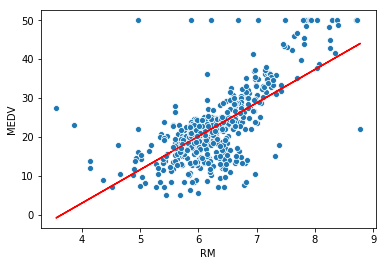

In [16]:
#Plot points
sns.scatterplot(x=X_train, y=y_train)
#Plot regression line
plt.plot(X_train, y_end, 'r')